In [5]:
import pandas as pd

# Define the column names extracted from the .names file
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Load the data file with the above column names
df = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)

# Show the first 5 rows to verify loading
print("First 5 rows of the dataset:")
print(df.head())

# Show dataset summary info (number of rows, columns, non-null counts, datatypes)
print("\nDataset info:")
print(df.info())

# Count missing/unknown values represented as '?'
missing_counts = df.isin(['?']).sum()
print("\nCount of '?' (missing/unknown) per column:")
print(missing_counts[missing_counts > 0])

# Show class distribution (counts and percentage)
class_counts = df['class'].value_counts()
class_percent = df['class'].value_counts(normalize=True) * 100
print("\nClass distribution:")
print(pd.DataFrame({'Count': class_counts, 'Percentage (%)': class_percent}))


First 5 rows of the dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w    

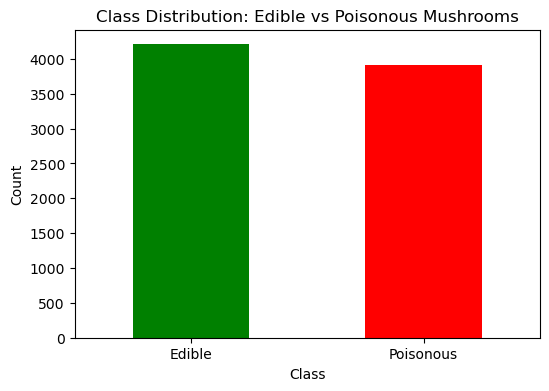


Class distribution (Counts and Percentages):
       Count  Percentage (%)
class                       
e       4208       51.797144
p       3916       48.202856

Missing values in 'stalk-root' column:
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64


In [2]:
import matplotlib.pyplot as plt

# Step 2: Visualize class distribution
class_counts = df['class'].value_counts()
class_percent = df['class'].value_counts(normalize=True) * 100

# Plot the class distribution
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution: Edible vs Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'], rotation=0)
plt.show()

# Show the count and percentage in tabular format
print("\nClass distribution (Counts and Percentages):")
print(pd.DataFrame({'Count': class_counts, 'Percentage (%)': class_percent}))

# Step 3: Check missing values in 'stalk-root'
print("\nMissing values in 'stalk-root' column:")
print(df['stalk-root'].value_counts())

In [4]:
import pandas as pd

# Load the data again if necessary (this step is for context; skip if already loaded)
df = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)

# Step 1: Handle Missing Values in 'stalk-root' column
# Replace '?' with 'unknown' to treat missing values as a separate category
df['stalk-root'] = df['stalk-root'].replace('?', 'unknown')

# Step 2: Encoding Categorical Features

# 2.1: One-Hot Encoding for features with no natural order (like 'odor', 'cap-color', etc.)
# Use pd.get_dummies() to create binary columns for each category
df_encoded = pd.get_dummies(df, columns=[
    'cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
])

# 2.2: Label Encoding for any ordinal features (e.g., 'bruises', 'class')
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'class' (target column) and 'bruises' as these might have an ordinal relationship
df_encoded['class'] = label_encoder.fit_transform(df_encoded['class'])  # 'e' -> 0, 'p' -> 1
df_encoded['bruises'] = label_encoder.fit_transform(df_encoded['bruises'])  # 't' -> 1, 'f' -> 0

# Step 3: Check the processed data
print("\nProcessed DataFrame (first 5 rows):")
print(df_encoded.head())

# Step 4: Check for any remaining missing values
print("\nCheck for missing values after preprocessing:")
print(df_encoded.isnull().sum())



Processed DataFrame (first 5 rows):
   class  bruises  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0      1        1        False        False        False        False   
1      0        1        False        False        False        False   
2      0        1         True        False        False        False   
3      1        1        False        False        False        False   
4      0        0        False        False        False        False   

   cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  ...  population_s  \
0        False         True          False          False  ...          True   
1        False         True          False          False  ...         False   
2        False        False          False          False  ...         False   
3        False         True          False          False  ...          True   
4        False         True          False          False  ...         False   

   population_v  population_y  habitat_d  h

In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [6]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 1: Prepare the features and target variable
X = df_encoded.drop('class', axis=1)  # Features (everything except 'class')
y = df_encoded['class']  # Target (class)

# Step 2: Initialize classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Step 3: Set up Stratified k-Fold Cross-Validation (ensures class distribution in each fold)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: Perform cross-validation for both models
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=kf, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

# Step 5: Print Cross-Validation Results
print(f"\nDecision Tree Accuracy (10-fold CV): {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")
print(f"Random Forest Accuracy (10-fold CV): {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# Step 6: Train models and print classification reports (Accuracy, Precision, Recall, F1-score)
dt_classifier.fit(X, y)
rf_classifier.fit(X, y)

# Step 7: Predictions (on the entire dataset for evaluation purposes)
dt_preds = dt_classifier.predict(X)
rf_preds = rf_classifier.predict(X)

# Step 8: Print confusion matrix and classification report for both models
print("\nDecision Tree - Confusion Matrix:")
print(confusion_matrix(y, dt_preds))
print("\nDecision Tree - Classification Report:")
print(classification_report(y, dt_preds))

print("\nRandom Forest - Confusion Matrix:")
print(confusion_matrix(y, rf_preds))
print("\nRandom Forest - Classification Report:")
print(classification_report(y, rf_preds))



Decision Tree Accuracy (10-fold CV): 1.0000 ± 0.0000
Random Forest Accuracy (10-fold CV): 1.0000 ± 0.0000

Decision Tree - Confusion Matrix:
[[4208    0]
 [   0 3916]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4208
           1       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124


Random Forest - Confusion Matrix:
[[4208    0]
 [   0 3916]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4208
           1       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124

